In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


In [17]:
# Convertire immagini MNIST in tensori di 4 dimensioni (n di immagini, altezza, larghezza e canali)
transform = transforms.ToTensor()
# Dati di training
train_data = datasets.MNIST(root = 'cnn_data', train = True, download=True, transform=transform)
# Dati di test
test_data = datasets.MNIST(root = 'cnn_data', train = False, download=True, transform=transform)
# Dataloader
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [18]:
# Definiamo la CNN
conv1 = nn.Conv2d(1, 6, 3, 1)
conv2 = nn.Conv2d(6, 16, 3, 1)
# Prendiamo 1 immagine MNIST
for i, (x_train, y_train) in enumerate(train_data):
    break
x_train.shape

torch.Size([1, 28, 28])

In [19]:
# Convertire l'immagine in 4D
x = x_train.view(1, 1,28,28)
# Prima convoluzione
x = F.relu(conv1(x)) # Funzione di Attivazione
# x.shape OUTPUT: 1,6,26,26: 1 è l'immagine singola, 
# 6 i filtri che abbiamo chiesto (riga 24),
# 26*26 è l'immagine.
# Pooling layer
x = F.max_pool2d(x, 2, 2) # Kernel size 2 e stride 2 
x = F.relu(conv2(x))
x = F.max_pool2d(x, 2, 2)

In [20]:
# Classe del modello
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        # Fully connected layer
        self.fc1 = nn.Linear(5*5*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2) # 2 x 2 Kernel e Stride 2
        
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        
        x = x.view(-1, 16*5*5) # Numero negativo cosi possiamo variare la dimensione del batch

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
    
# Creiamo un istanza del modello
torch.manual_seed(41)
model = ConvolutionalNetwork()

In [ ]:
#Loss FN Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

# Allenamento
# Variabili
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# Loop
for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    # train
    for b,(x_train, y_train) in enumerate(train_loader):
        b += 1 # Inizializziamo i nostri batches a 1
        y_pred = model(x_train) # Prendiamo la y iniziale dal nostro set di addestramento
        loss = criterion(y_pred, y_train) # Confrontiamo la predizione con le risposte corrette in y_train
        
        predicted = torch.max(y_pred.data, 1)[1] # Aggiungere il numero delle predizioni corrette. Indicizzato al primo punto
        batch_corr = (predicted == y_train).sum() # Quando è stato corretto dal suo batch. True = 1, False = 0
        trn_corr += batch_corr # Tiene traccia mentre procediamo con l'allenamento
        # Aggiornamento Parametri
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
        # Print
        if b%600 == 0:
            print(f'Epoch: {i} Batch: {b} Loss: {loss.item()}')
    train_losses.append(loss)
    train_correct.append(trn_corr)

Epoch: 0 Batch: 600 Loss: 0.1581714004278183
Epoch: 0 Batch: 1200 Loss: 0.1559135615825653
Epoch: 0 Batch: 1800 Loss: 0.45930391550064087
Epoch: 0 Batch: 2400 Loss: 0.1260259747505188
Epoch: 0 Batch: 3000 Loss: 0.009245113469660282
Epoch: 0 Batch: 3600 Loss: 0.2598399519920349
Epoch: 0 Batch: 4200 Loss: 0.0036265631206333637
Epoch: 0 Batch: 4800 Loss: 0.0022524266969412565
Epoch: 0 Batch: 5400 Loss: 0.05543122440576553
Epoch: 0 Batch: 6000 Loss: 0.0008104426669888198
Epoch: 1 Batch: 600 Loss: 0.005055197514593601
Epoch: 1 Batch: 1200 Loss: 0.009646776132285595
Epoch: 1 Batch: 1800 Loss: 0.04765116795897484


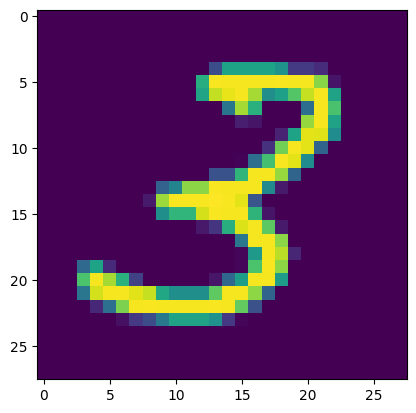

In [ ]:
img_idx = 5224
# Prendiamo un'immagine
test_data[img_idx] # tensore con un immagine e mostrerà il label 
# Prendiamone solo i dati
test_data[img_idx][0]
# Ridimensioniamo
test_data[img_idx][0].reshape(28, 28)
# Mostrare
plt.imshow(test_data[img_idx][0].reshape(28, 28)
)

In [ ]:
# Passiamo l'immagine al model
model.eval()
with torch.no_grad():
    new_pred = model(test_data[img_idx][0].view(1,1,28,28)) #batch_size di 1, 1 canale dei colori, dimensione 28*28
# probabilità 
new_pred 

tensor([[-0.1094, -0.0438,  0.0467,  0.0137,  0.0716,  0.0283, -0.0660, -0.1108,
          0.0137, -0.0083]])

In [ ]:
new_pred.argmax()

tensor(4)